In [2]:
%pylab inline
import scipy.stats as sps
import numpy as np
import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


In [3]:
s = sps.norm.rvs(size=10000, loc=0, scale=1)
grid = np.linspace(min(s), max(s), 1000)

Эмпирическая функция распределения

In [4]:
def f(n):
    sort = sorted(s[:n])
    points = []
    f = np.zeros(len(grid))
    i = 0
    flag = False
    for k in range(len(grid)):
        while i < n and sort[i] < grid[k]:
            flag = True
            i += 1
        if flag:
            points.append(grid[k])
        flag = False
        f[k] = float(i * (n**(-1))) 
    return (f, points)

In [7]:
def print_plot(n):
    plt.title('n=' + str(n))
    pair = f(n)
    plt.plot(grid, pair[0], color='blue', label=r'$F_n^*(y)$')
    plt.plot(grid, sps.norm.cdf(grid, loc=0, scale=1), color='red', label='$F(y)$')
    plt.scatter(pair[1], np.zeros(len(pair[1])), alpha=0.2, color='blue')
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.show()

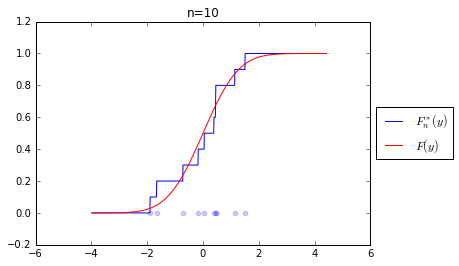

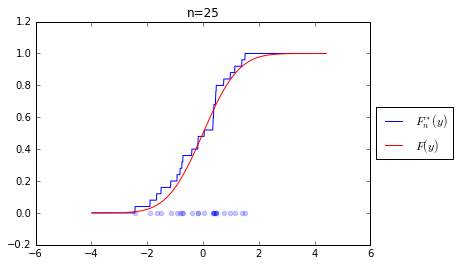

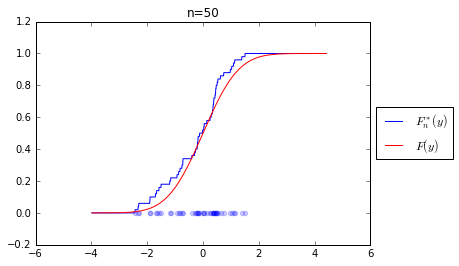

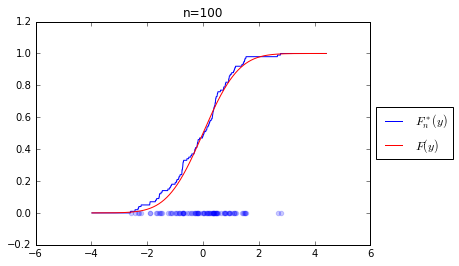

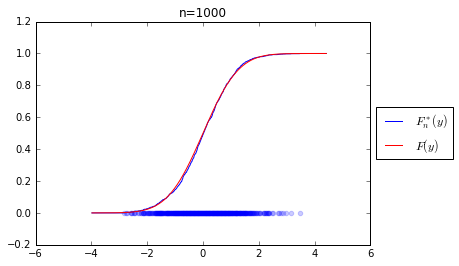

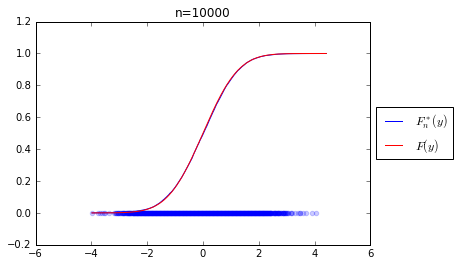

In [8]:
print_plot(10)
print_plot(25)
print_plot(50)
print_plot(100)
print_plot(1000)
print_plot(10000)

График зависимости $D_{n}$ от n

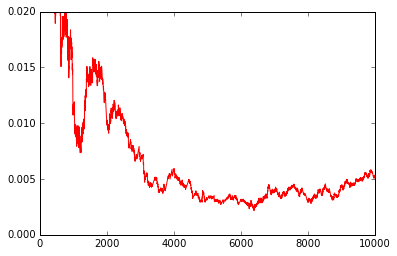

In [9]:
d = np.zeros(10000)
for n in range(10000):
    ar = f(n + 1)[0] - sps.norm.cdf(grid, loc=0, scale=1)
    d[n] = max(ar)
plt.ylim((0, 0.02))
plt.plot(np.arange(1, 10001), d, color='red')
plt.show()